# Monitoring de la VFC

1.	Évolution de la FC (fréquence cardiaque) :
- Comparez la moyenne de la fréquence cardiaque pour chaque jour/semaine.
- Représentez cela dans un graphique (évolution journalière ou hebdomadaire).

2.	Analyses temporelles et spectrales :
- Temporelles : Moyenne RR, SDNN (écart-type des intervalles RR), RMSSD.
- Spectrales : Low Frequency (LF), High Frequency (HF), ratio LF/HF, Welch, FFT


# I) Représentation graphique des paramètres les plus pertinents pour l'analyse temporelle de la variabilité de la fréquence cardiaque (VFC). 

Les enregistrement ont été fait en position allongé.

La variabilité de la Fréquence cardiaque est due au mode de contrôle du rythme cardiaque, influencée et modifiée par un système hormonal et par le système nerveux végétatif. Ainsi la fréquence cardiaque est la résultante de deux composantes : une activité sympathique cardioaccélératrice d’une part, et une activité parasympathique cardiodécélératrice, d’autre part. Ces deux composantes sont antagonistes et fonctionnent simultanément. 

Stress = système nerveux sympathique joue sur l'activité cardiaque = augmente la fréquence cardiaque 
No stress/Relaxation = Système nerveux parasympathique = baisse de la fréquence cardiaque. 

In [1]:
import pandas as pd

# Importer les données
file_path = "C:\\Users\\user\\OneDrive\\Documents\\M2 SNS IDS\\HAH913E - Santé activité physique 5\\Physiologie\\Py_Data_HRV - Data.csv"
hrv_data = pd.read_csv(file_path)

# Afficher la strucutres 
hrv_data.head()


,Date,28/10/2024,29/10/2024,30/10/2024,31/10/2024,01/11/2024,02/11/2024,03/11/2024,04/11/2024,5/11/2024,...,15/11/2024,16/11/2024,17/11/2024,18/11/2024,19/11/2024,20/11/2024,21/11/2024,22/11/2024,23/11/2024,24/11/2024
0,Mean RR* (ms),978.0,900.00,921.00,942.00,945.00,812.00,875.00,987.00,964.00,...,962.00,890.00,1034.00,1144.00,956.00,1114.0,990.00,1091.00,1106.00,997.00
1,Mean HR* (bpm),61.0,67.00,65.00,64.00,64.00,74.00,69.00,61.00,62.00,...,62.00,67.00,58.00,52.00,63.00,54.0,61.00,55.00,54.00,60.00
2,SDNN (ms),182.5,167.10,192.60,212.20,214.60,148.70,184.50,228.10,692.60,...,283.00,178.20,233.00,251.10,158.50,137.8,198.90,153.80,163.80,166.60
3,RMSSD (ms),226.8,187.10,220.70,240.00,244.30,170.80,215.00,278.80,996.00,...,382.30,230.80,325.90,383.60,222.00,189.3,254.60,201.00,237.10,216.90
4,pNN50 (%),64.0,61.76,65.24,66.04,66.25,39.25,57.06,73.03,87.82,...,71.79,64.29,69.44,71.54,67.74,64.0,70.67,60.29,82.84,79.19


In [2]:
hrv_data.columns

Index(['Date ', '28/10/2024', '29/10/2024', '30/10/2024', '31/10/2024',
       '01/11/2024', '02/11/2024', '03/11/2024', '04/11/2024', '5/11/2024',
       '06/11/2024', '07/11/2024', '08/11/2024', '09/11/2024', '10/11/2024',
       '11/11/2024', '12/11/2024', '13/11/2024', '14/11/2024', '15/11/2024',
       '16/11/2024', '17/11/2024', '18/11/2024', '19/11/2024', '20/11/2024',
       '21/11/2024', '22/11/2024', '23/11/2024', '24/11/2024'],
      dtype='object')

In [3]:
import matplotlib.pyplot as plt

# Nettoyer les noms de colonnes pour supprimer les espaces au début ou à la fin.
hrv_data.columns = hrv_data.columns.str.strip()

# Vérifier si la colone date existe la renomer métric si c'est le cas 
if 'Date' in hrv_data.columns:
    hrv_data = hrv_data.rename(columns={"Date": "Metric"}).set_index("Metric").T
else:
    # Handle cases where 'Date' might not be the column name
    print("La colonne 'Date' n'est pas trouvée. Assurez-vous que le fichier contient une colonne pour les métriques.")

# Convertir l'index en format datetime
try:
    hrv_data.index = pd.to_datetime(hrv_data.index, format='%d/%m/%Y', errors='coerce')
except Exception as e:
    print("Erreur lors de la conversion des dates :", e)

# Convertir les datas en données numéris pour les tracés 
hrv_data = hrv_data.apply(pd.to_numeric, errors='coerce')

# Vérifier la structure finale des données
print(hrv_data.head())


Metric      Mean RR* (ms)  Mean HR* (bpm)  SDNN (ms)  RMSSD (ms)  pNN50 (%)  \
2024-10-28          978.0            61.0      182.5       226.8      64.00   
2024-10-29          900.0            67.0      167.1       187.1      61.76   
2024-10-30          921.0            65.0      192.6       220.7      65.24   
2024-10-31          942.0            64.0      212.2       240.0      66.04   
2024-11-01          945.0            64.0      214.6       244.3      66.25   

Metric      Stress index  
2024-10-28           2.6  
2024-10-29           4.2  
2024-10-30           3.6  
2024-10-31           2.9  
2024-11-01           2.8  


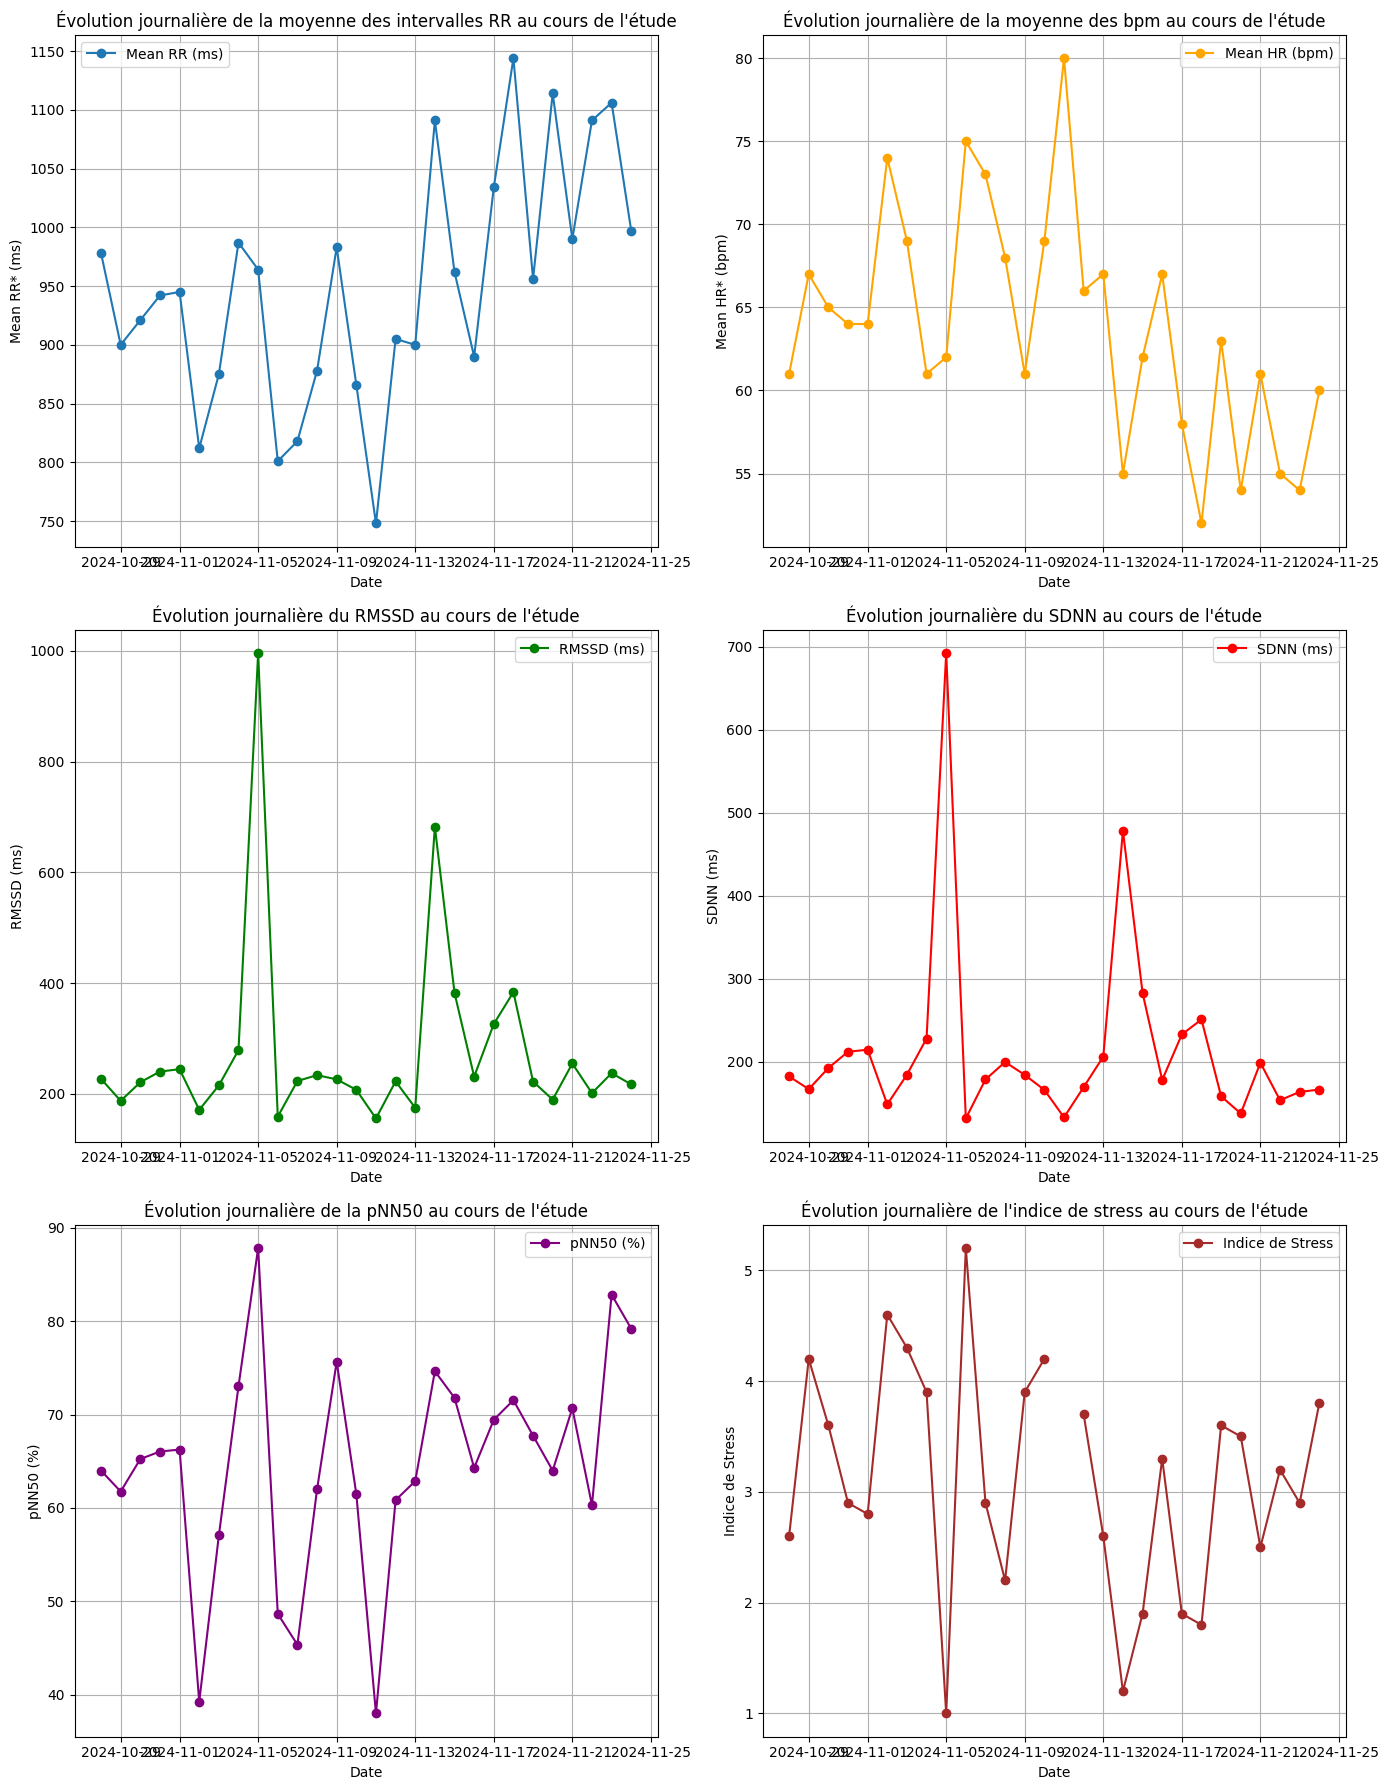

In [4]:
# Extraire les données du tableau
mean_rr = hrv_data['Mean RR* (ms)']
mean_hr = hrv_data['Mean HR* (bpm)']
rmssd = hrv_data['RMSSD (ms)']
sdnn = hrv_data['SDNN (ms)']
pnn50 = hrv_data['pNN50 (%)']
stress_index = hrv_data['Stress index']

# Adapter la visualisation 

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Mean RR (ms)
axes[0, 0].plot(mean_rr, label='Mean RR (ms)', marker='o')
axes[0, 0].set_title("Évolution journalière de la moyenne des intervalles RR au cours de l'étude")
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Mean RR* (ms)')
axes[0, 0].grid()
axes[0, 0].legend()

# Mean HR (bpm)
axes[0, 1].plot(mean_hr, label='Mean HR (bpm)', marker='o', color='orange')
axes[0, 1].set_title("Évolution journalière de la moyenne des bpm au cours de l'étude")
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Mean HR* (bpm)')
axes[0, 1].grid()
axes[0, 1].legend()

# RMSSD (ms)
axes[1, 0].plot(rmssd, label='RMSSD (ms)', marker='o', color='green')
axes[1, 0].set_title("Évolution journalière du RMSSD au cours de l'étude")
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('RMSSD (ms)')
axes[1, 0].grid()
axes[1, 0].legend()

# SDNN (ms)
axes[1, 1].plot(sdnn, label='SDNN (ms)', marker='o', color='red')
axes[1, 1].set_title("Évolution journalière du SDNN au cours de l'étude")
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('SDNN (ms)')
axes[1, 1].grid()

axes[1, 1].legend()

# pNN50 (%)
axes[2, 0].plot(pnn50, label='pNN50 (%)', marker='o', color='purple')
axes[2, 0].set_title("Évolution journalière de la pNN50 au cours de l'étude")
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('pNN50 (%)')
axes[2, 0].grid()
axes[2, 0].legend()

# Stress Index
axes[2, 1].plot(stress_index, label='Indice de Stress', marker='o', color='brown')
axes[2, 1].set_title("Évolution journalière de l'indice de stress au cours de l'étude")
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Indice de Stress')
axes[2, 1].grid()
axes[2, 1].legend()


# Final adjustments
plt.tight_layout()
plt.show()


### **1. Évolution journalière de la moyenne des intervalles RR (Mean RR)**

Ce Graphique représente les variations de la durée moyennes des intervalles RR en ms = intervalles entres les battements cardiaques/  temps entre 2 complexes QRS. 

- La fréquence cardiaque est plus lente =  durée des intervalles RR augmentent. 
- La Fréquence cardiaque est plus rapide = durée des intervalles RR diminuent. 

Une variabilité cohérente et modérée peut indiquer un bon équilibre entre les systèmes nerveux sympathique et parasympathique.


### **2. Évolution de la moyenne des bpm (Mean HR)**

Ce graphique représente la fréquence cardiaque moyenne journalière (en battements par minute, bpm) .

- Baisse de la fréquence Cardiaque = Amélioration de la condition physique 
- Augmentation soudaine ou prolonger de la fréquence cardiaque = Stress/ Fatigue/ charge physique importante  

### **3. Évolution du RMSSD**

Ce graphique représente les variations à court terme dans les intervalles RR. Ceci est caractéristique du système nerveux autonome. 

- Valeurs élevées = bon niveau de récupération et peu de stress. 
- Valeurs Basses = Stress/ fatigue chronique. 

### **4. Évolution du SDNN**

Ce graphique représente la mesure globale de la variabilité de la fréquence cardiaque, prennant en compte l'ensemble des intervalles RR. 

- Valeurs élevées = Bonne capacité d'adaptation/ équilibre autonome sain.
- Valeurs faibles = Stress important / Condition physique réduite.

### **5. Évolution de la pNN50**

Ce graphique représente le pourcentage d'intervalles RR concécutifs ayant une différence de plusd e 50ms. Ceci est caractéristique de l'activité parasympathique. 

- Valeurs élevées = Bonne régulation autonome/ état Relaxé
- Valeurs faibles = Stress accru/ Mauvaise récupération.

### **6. Indice de Stress**

Ce graphique représente l'évaluation du niveau de stress basé sur les caractéristiques des intervalles RR. 

- Indice faible =  Relaxation/ Récupération.
- Indice élevé = Signe Stress mental ou physique accru. Haute activité cardiaque sympathique.    

# II) Statistiques descriptives 

In [5]:
# Calculer la moyenne et l'écart type pour chaque métrique
summary_stats = hrv_data.describe().loc[['mean', 'std']].T
summary_stats.rename(columns={'mean': 'Moyenne', 'std': 'Écart type'}, inplace=True)

# Afficher le tableau sous forme de texte
print("Résumé des statistiques des données HRV :\n")
print(summary_stats)



Résumé des statistiques des données HRV :

                   Moyenne  Écart type
Metric                                
Mean RR* (ms)   949.928571  100.370768
Mean HR* (bpm)   63.821429    6.826167
SDNN (ms)       214.142857  114.380306
RMSSD (ms)      275.189286  173.868252
pNN50 (%)        64.705357   11.620825
Stress index      3.118519    1.034422


# III) Analyse spectrale 

In [24]:
data_path = '/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/projet PY/Github py /VFC-Analysis/data/data4semaines.csv'  # Remplacez par votre chemin
data = pd.read_csv(data_path, delimiter=';')

# Afficher la strucutres 
data.head()

# Inspecter les colonnes et les premières lignes de données
print(data.head())
print(data.columns)



    0             1             2             3             4             5  \
0 NaN       RR Data                FFT spectrum                 AR Spectrum   
1 NaN          Time   RR interval     Frequency           PSD     Frequency   
2 NaN           (s)           (s)          (Hz)     (ms^2/Hz)          (Hz)   
3 NaN         0.976         0.976         0.000        0.3730         0.000   
4 NaN         2.307         1.331         0.003        0.6392         0.003   

              6             7             8             9  10        Date  
0                                                         NaN         NaN  
1           PSD     VLF comp.      LF comp.      HF comp. NaN         NaN  
2     (ms^2/Hz)     (ms^2/Hz)     (ms^2/Hz)     (ms^2/Hz) NaN         NaN  
3     5115.9497                                           NaN  2024-10-28  
4    10251.4397                                           NaN  2024-10-28  
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Date'

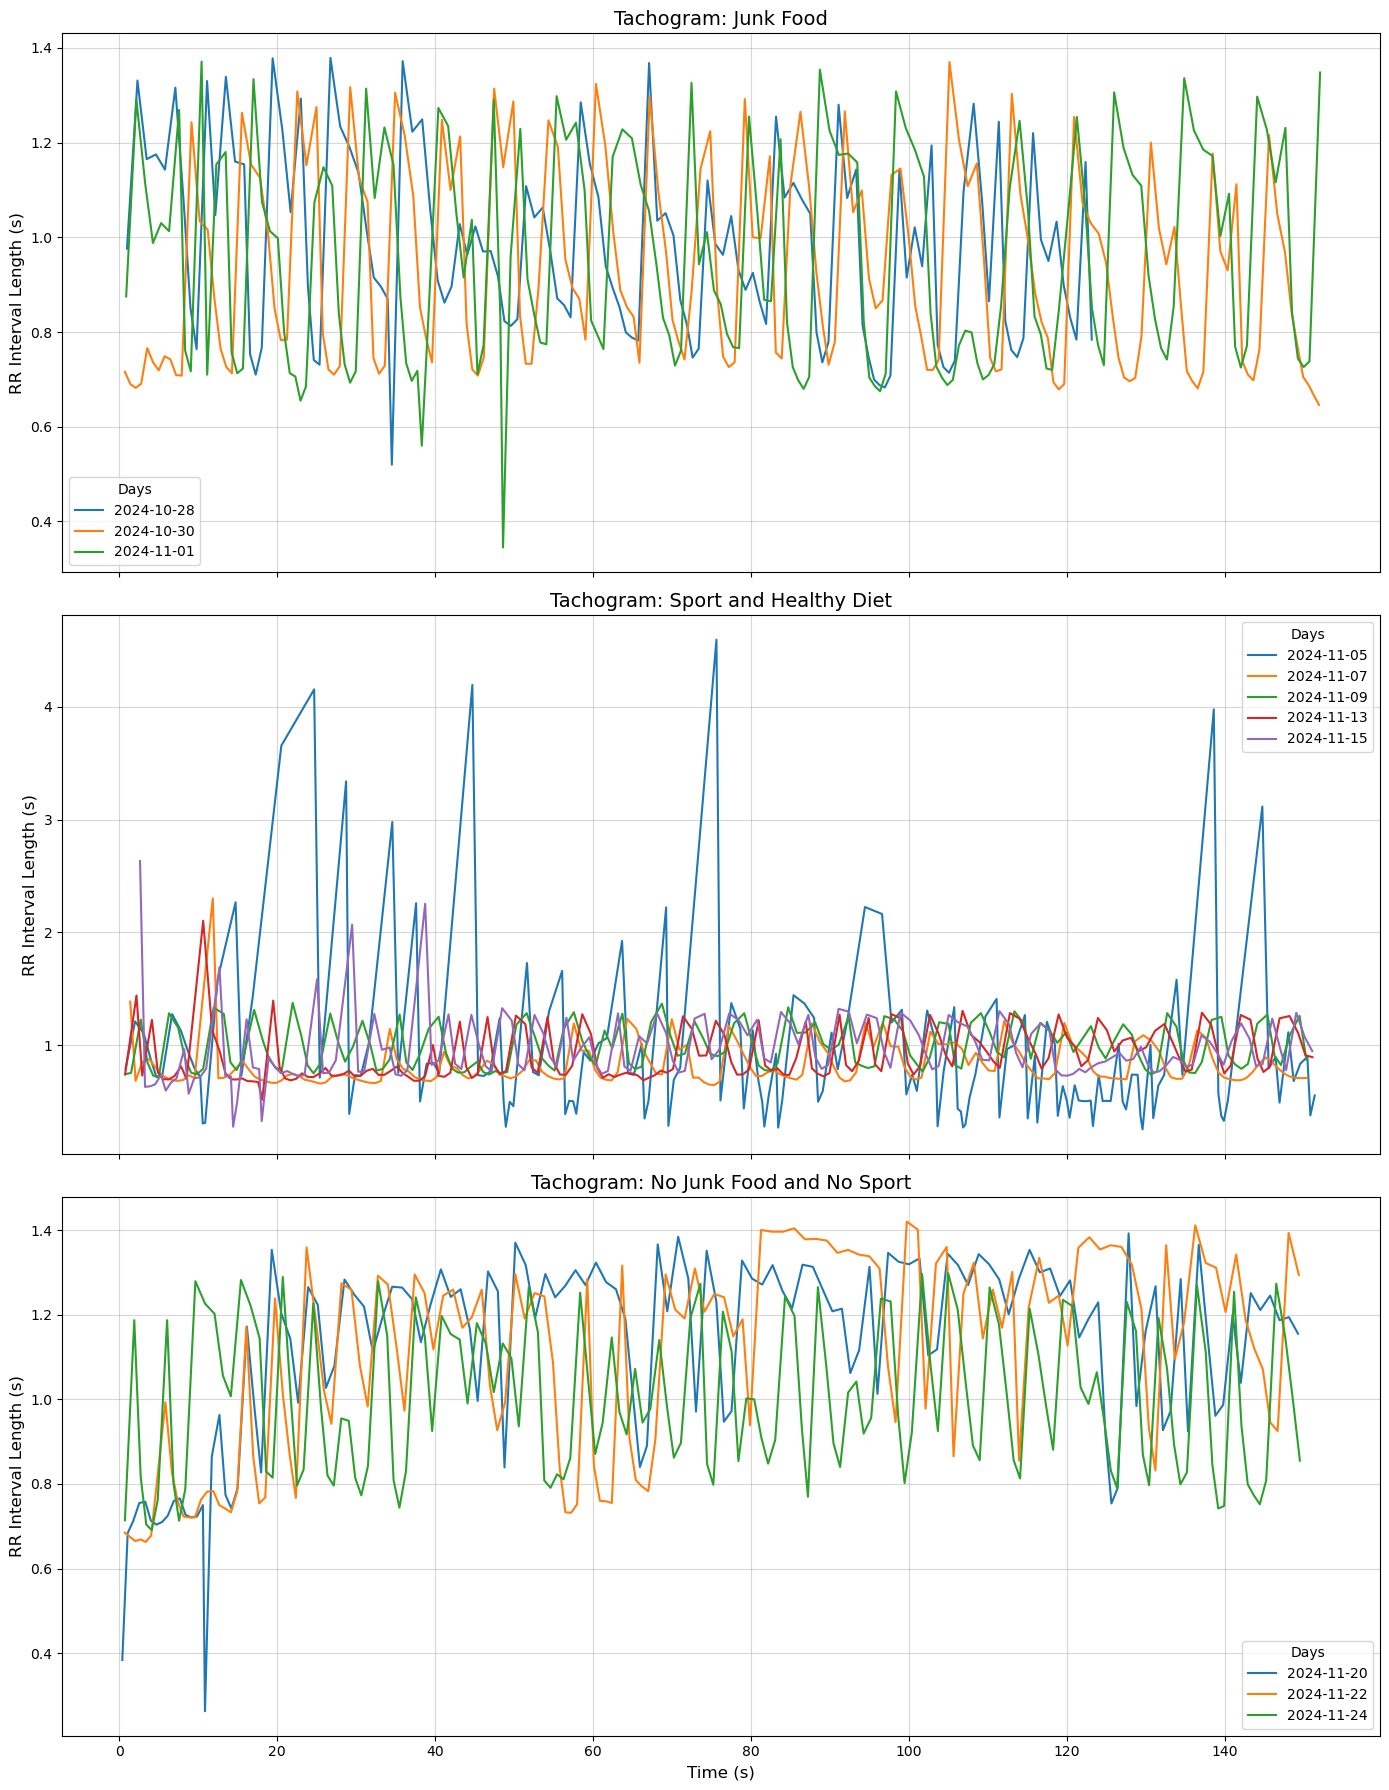

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
file_path = '/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/projet PY/Github py /VFC-Analysis/data/data4semainesfinal.csv'
data = pd.read_csv(file_path, delimiter=';')

# Supprimer les espaces dans les noms de colonnes
data.columns = data.columns.str.strip()

# Convertir les colonnes pertinentes en numérique, en gérant les erreurs
data['Time   (s)'] = pd.to_numeric(data['Time   (s)'], errors='coerce')
data['RR interval   (s)'] = pd.to_numeric(data['RR interval   (s)'], errors='coerce')

# Convertir la colonne Date en format datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Nettoyer les données : retirer les lignes contenant des valeurs NaN
cleaned_data = data.dropna(subset=['Time   (s)', 'RR interval   (s)', 'Date'])

# Définir les périodes basées sur les dates spécifiées
periods = {
    "Junk Food": ["2024-10-28", "2024-10-30", "2024-11-01"],
    "Sport and Healthy Diet": ["2024-11-05", "2024-11-07", "2024-11-09", 
                               "2024-11-13", "2024-11-15", "2024-11-17"],
    "No Junk Food and No Sport": ["2024-11-20", "2024-11-22", "2024-11-24"]
}

# Convertir les périodes en datetime pour le filtrage
periods = {key: [pd.to_datetime(date) for date in dates] for key, dates in periods.items()}

# Créer des sous-ensembles de données pour chaque période
period_data = {}
for period_name, dates in periods.items():
    period_data[period_name] = cleaned_data[cleaned_data['Date'].isin(dates)]

# Tracer les tachogrammes pour chaque période
fig, axes = plt.subplots(len(period_data), 1, figsize=(14, 18), sharex=True)

for ax, (period_name, data_subset) in zip(axes, period_data.items()):
    for day in data_subset['Date'].unique():
        day_data = data_subset[data_subset['Date'] == day]
        ax.plot(day_data['Time   (s)'], day_data['RR interval   (s)'], 
                label=f"{pd.to_datetime(day).strftime('%Y-%m-%d')}")
    ax.set_title(f"Tachogram: {period_name}", fontsize=14)
    ax.set_ylabel("RR Interval Length (s)", fontsize=12)
    ax.legend(title="Days")
    ax.grid(alpha=0.5)

axes[-1].set_xlabel("Time (s)", fontsize=12)

plt.tight_layout()
plt.show()


In [63]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# Charger les données
file_path = '/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/projet PY/Github py /VFC-Analysis/data/data4semainesfinal.csv'
hrv_data = pd.read_csv(file_path, delimiter=';')

# Nettoyage et renommer les colonnes
hrv_data.columns = hrv_data.columns.str.strip()
hrv_data = hrv_data.rename(columns={
    'Time   (s)': 'Time (s)',
    'RR interval   (s)': 'RR interval (s)',
    'Fréquence  (Hz)': 'Frequency (Hz)',
    'PSD (ms^2/Hz)': 'PSD',
    'AR SPECTRUM  Fréquence   (Hz)': 'AR Frequency (Hz)',
    'AR SPECTRUM PSD (ms^2/Hz)': 'AR PSD (ms^2/Hz)',
    'Date': 'Date'
})

# Convertir la colonne 'Date' en type datetime
hrv_data['Date'] = pd.to_datetime(hrv_data['Date'])

# Convertir les intervalles RR en type numérique
hrv_data['RR interval (s)'] = pd.to_numeric(hrv_data['RR interval (s)'], errors='coerce')

# Définir les périodes
periods = {
    'No Sport & Junk Food': (pd.Timestamp('2024-10-28'), pd.Timestamp('2024-11-03')),
    'Sport & Healthy Diet': (pd.Timestamp('2024-11-04'), pd.Timestamp('2024-11-18')),
    'No Sport & No Junk Food': (pd.Timestamp('2024-11-19'), pd.Timestamp('2024-11-24'))
}

# Fonction pour effectuer l'analyse spectrale
def spectral_analysis(rr_intervals, fs=4):
    """Perform spectral analysis on RR intervals."""
    # Interpolation pour échantillonnage uniforme
    time = np.linspace(0, len(rr_intervals) - 1, len(rr_intervals))
    interpolated_rr = np.interp(np.arange(0, len(rr_intervals), 1/fs), time, rr_intervals)

    # Calcul du spectre de puissance (méthode de Welch)
    frequencies, power = welch(interpolated_rr, fs=fs, nperseg=256)

    # Définir les bandes LF et HF
    lf_band = (frequencies >= 0.04) & (frequencies < 0.15)
    hf_band = (frequencies >= 0.15) & (frequencies <= 0.4)

    # Calculer les puissances dans chaque bande
    lf_power = np.trapz(power[lf_band], frequencies[lf_band])
    hf_power = np.trapz(power[hf_band], frequencies[hf_band])
    lf_hf_ratio = lf_power / hf_power if hf_power > 0 else np.nan

    return lf_power, hf_power, lf_hf_ratio

# Analyse spectrale pour chaque période
results = []
for period_name, (start_date, end_date) in periods.items():
    # Filtrer les données pour la période
    period_data = hrv_data[(hrv_data['Date'] >= start_date) & (hrv_data['Date'] <= end_date)]

    # Extraire les intervalles RR
    rr_intervals = period_data['RR interval (s)'].dropna().values

    if len(rr_intervals) > 0:
        # Effectuer l'analyse spectrale
        lf_power, hf_power, lf_hf_ratio = spectral_analysis(rr_intervals)
    else:
        lf_power, hf_power, lf_hf_ratio = np.nan, np.nan, np.nan

    # Sauvegarder les résultats
    results.append({
        'Period': period_name,
        'LF Power': lf_power,
        'HF Power': hf_power,
        'LF/HF Ratio': lf_hf_ratio
    })

# Convertir les résultats en DataFrame
spectral_results = pd.DataFrame(results)

# Afficher les résultats
print(spectral_results)




                    Period  LF Power  HF Power  LF/HF Ratio
0     No Sport & Junk Food  0.014698  0.008232     1.785413
1     Sport & Healthy Diet  0.019841  0.025240     0.786109
2  No Sport & No Junk Food  0.006279  0.010343     0.607117


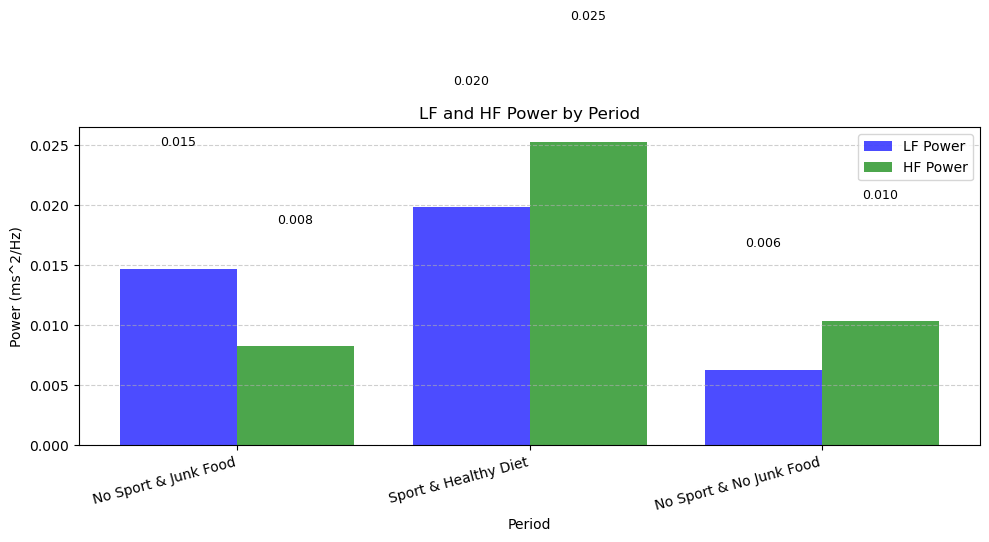

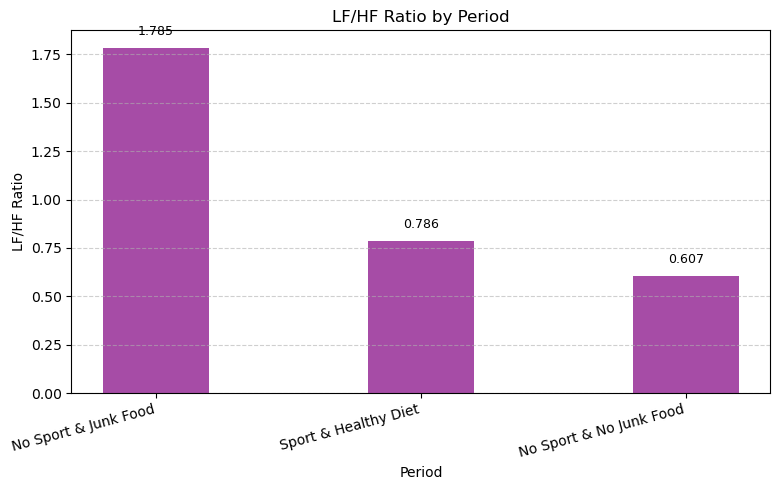

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Visualiser les puissances LF et HF côte à côte
plt.figure(figsize=(10, 6))

# Création des barres côte à côte pour LF et HF Power
bar_width = 0.4
x = np.arange(len(spectral_results['Period']))

# Barres pour LF Power
plt.bar(x - bar_width / 2, spectral_results['LF Power'], label='LF Power', alpha=0.7, color='blue', width=bar_width)

# Barres pour HF Power
plt.bar(x + bar_width / 2, spectral_results['HF Power'], label='HF Power', alpha=0.7, color='green', width=bar_width)

# Ajout des valeurs au sommet des barres
for i, (lf, hf) in enumerate(zip(spectral_results['LF Power'], spectral_results['HF Power'])):
    plt.text(i - bar_width / 2, lf + 0.01, f'{lf:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + bar_width / 2, hf + 0.01, f'{hf:.3f}', ha='center', va='bottom', fontsize=9)

# Réglages supplémentaires
plt.xticks(x, spectral_results['Period'], rotation=15, ha='right')
plt.title("LF and HF Power by Period")
plt.ylabel("Power (ms^2/Hz)")
plt.xlabel("Period")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Visualiser le ratio LF/HF sur un graphique séparé
plt.figure(figsize=(8, 5))

# Barres pour le ratio LF/HF
plt.bar(x, spectral_results['LF/HF Ratio'], color='purple', alpha=0.7, width=bar_width)

# Ajout des valeurs au sommet des barres
for i, ratio in enumerate(spectral_results['LF/HF Ratio']):
    plt.text(i, ratio + 0.05, f'{ratio:.3f}', ha='center', va='bottom', fontsize=9)

# Réglages supplémentaires
plt.xticks(x, spectral_results['Period'], rotation=15, ha='right')
plt.title("LF/HF Ratio by Period")
plt.ylabel("LF/HF Ratio")
plt.xlabel("Period")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [43]:
hrv_data.head()

,Unnamed: 0,Time (s),RR interval (s),Frequency (Hz),PSD,AR Frequency (Hz),AR PSD (ms^2/Hz),Date
0,NaN,0.976,0.976,0.000,0.3730,0.000,5115.9497,2024-10-28
1,NaN,2.307,1.331,0.003,0.6392,0.003,10251.4397,2024-10-28
2,NaN,3.472,1.165,0.007,0.4548,0.007,10310.3423,2024-10-28
3,NaN,4.647,1.175,0.010,33.8769,0.010,10409.4606,2024-10-28
4,NaN,5.790,1.143,0.013,236.7866,0.013,10550.2446,2024-10-28


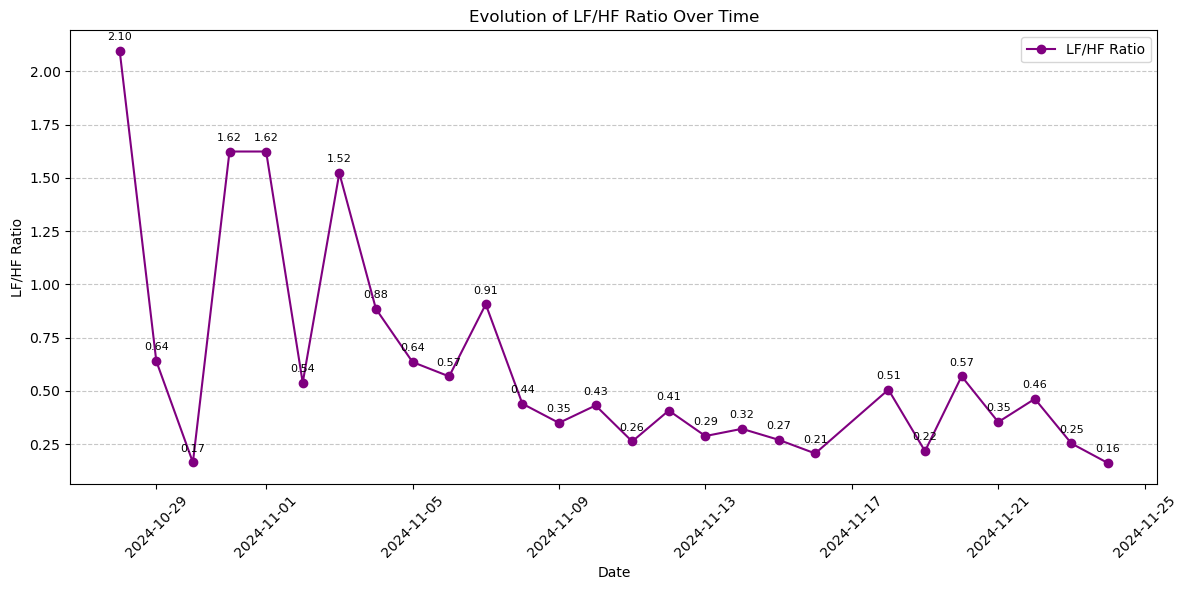

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
file_path = '/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/projet PY/Github py /VFC-Analysis/data/data4semainesfinal.csv'
data = pd.read_csv(file_path, delimiter=';')

# Nettoyer les noms des colonnes
data.columns = [
    "Index", "Time (s)", "RR interval (s)", "Frequency (Hz)", 
    "PSD (ms^2/Hz)", "AR Spectrum Frequency (Hz)", "AR Spectrum PSD (ms^2/Hz)", "Date"
]

# Convertir 'Date' en format datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Convertir les colonnes numériques
data['Frequency (Hz)'] = pd.to_numeric(data['Frequency (Hz)'], errors='coerce')
data['PSD (ms^2/Hz)'] = pd.to_numeric(data['PSD (ms^2/Hz)'], errors='coerce')

# Définir les bandes de fréquences LF et HF
lf_band = (0.04, 0.15)  # Bande LF (en Hz)
hf_band = (0.15, 0.4)   # Bande HF (en Hz)

# Fonction pour calculer les puissances LF et HF par jour
def calculate_lf_hf_ratios(group):
    lf_power = group.loc[(group['Frequency (Hz)'] >= lf_band[0]) & (group['Frequency (Hz)'] < lf_band[1]), 'PSD (ms^2/Hz)'].sum()
    hf_power = group.loc[(group['Frequency (Hz)'] >= hf_band[0]) & (group['Frequency (Hz)'] < hf_band[1]), 'PSD (ms^2/Hz)'].sum()
    lf_hf_ratio = lf_power / hf_power if hf_power > 0 else None
    return pd.Series({'LF Power': lf_power, 'HF Power': hf_power, 'LF/HF Ratio': lf_hf_ratio})

# Appliquer le calcul à chaque jour
daily_ratios = data.groupby('Date').apply(calculate_lf_hf_ratios).reset_index()

# Tracer l'évolution du ratio LF/HF au cours du temps
plt.figure(figsize=(12, 6))
plt.plot(daily_ratios['Date'], daily_ratios['LF/HF Ratio'], marker='o', linestyle='-', color='purple', label='LF/HF Ratio')

# Ajouter des annotations des points
for date, ratio in zip(daily_ratios['Date'], daily_ratios['LF/HF Ratio']):
    plt.text(date, ratio + 0.05, f'{ratio:.2f}', ha='center', fontsize=8)

# Ajustements finaux
plt.title("Evolution of LF/HF Ratio Over Time")
plt.xlabel("Date")
plt.ylabel("LF/HF Ratio")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


In [90]:
# Définir les périodes
periods = {
    "Junk Food (28/10/2024 - 03/11/2024)": ('2024-10-28', '2024-11-03'),
    "Sport & Healthy Diet (04/11/2024 - 18/11/2024)": ('2024-11-04', '2024-11-18'),
    "No Sport & No Junk Food (19/11/2024 - 24/11/2024)": ('2024-11-19', '2024-11-24')
}

# Calculer les moyennes pour chaque période
period_averages = {}
for period_name, (start_date, end_date) in periods.items():
    period_data = daily_ratios[(daily_ratios['Date'] >= start_date) & (daily_ratios['Date'] <= end_date)]
    period_averages[period_name] = period_data['LF/HF Ratio'].mean()

# Créer un DataFrame pour afficher les résultats
average_ratios = pd.DataFrame(list(period_averages.items()), columns=['Period', 'Average LF/HF Ratio'])

# Afficher le tableau des moyennes directement avec pandas
print("Average LF/HF Ratios by Period")
print(average_ratios)


Average LF/HF Ratios by Period
                                              Period  Average LF/HF Ratio
0                Junk Food (28/10/2024 - 03/11/2024)             1.172587
1     Sport & Healthy Diet (04/11/2024 - 18/11/2024)             0.463185
2  No Sport & No Junk Food (19/11/2024 - 24/11/2024)             0.336536


## FTT pour chaque période 


/var/folders/y_/tj2z2rjx2tg65pt0gnbj_k3h0000gn/T/ipykernel_33159/3191218500.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data[period_name]['RR interval (ms)'] = period_data[period_name]['RR interval   (s)'] * 1000
/var/folders/y_/tj2z2rjx2tg65pt0gnbj_k3h0000gn/T/ipykernel_33159/3191218500.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data[period_name]['RR interval (ms)'] = period_data[period_name]['RR interval   (s)'] * 1000
/var/folders/y_/tj2z2rjx2tg65pt0gnbj_k3h0000gn/T/ipyke

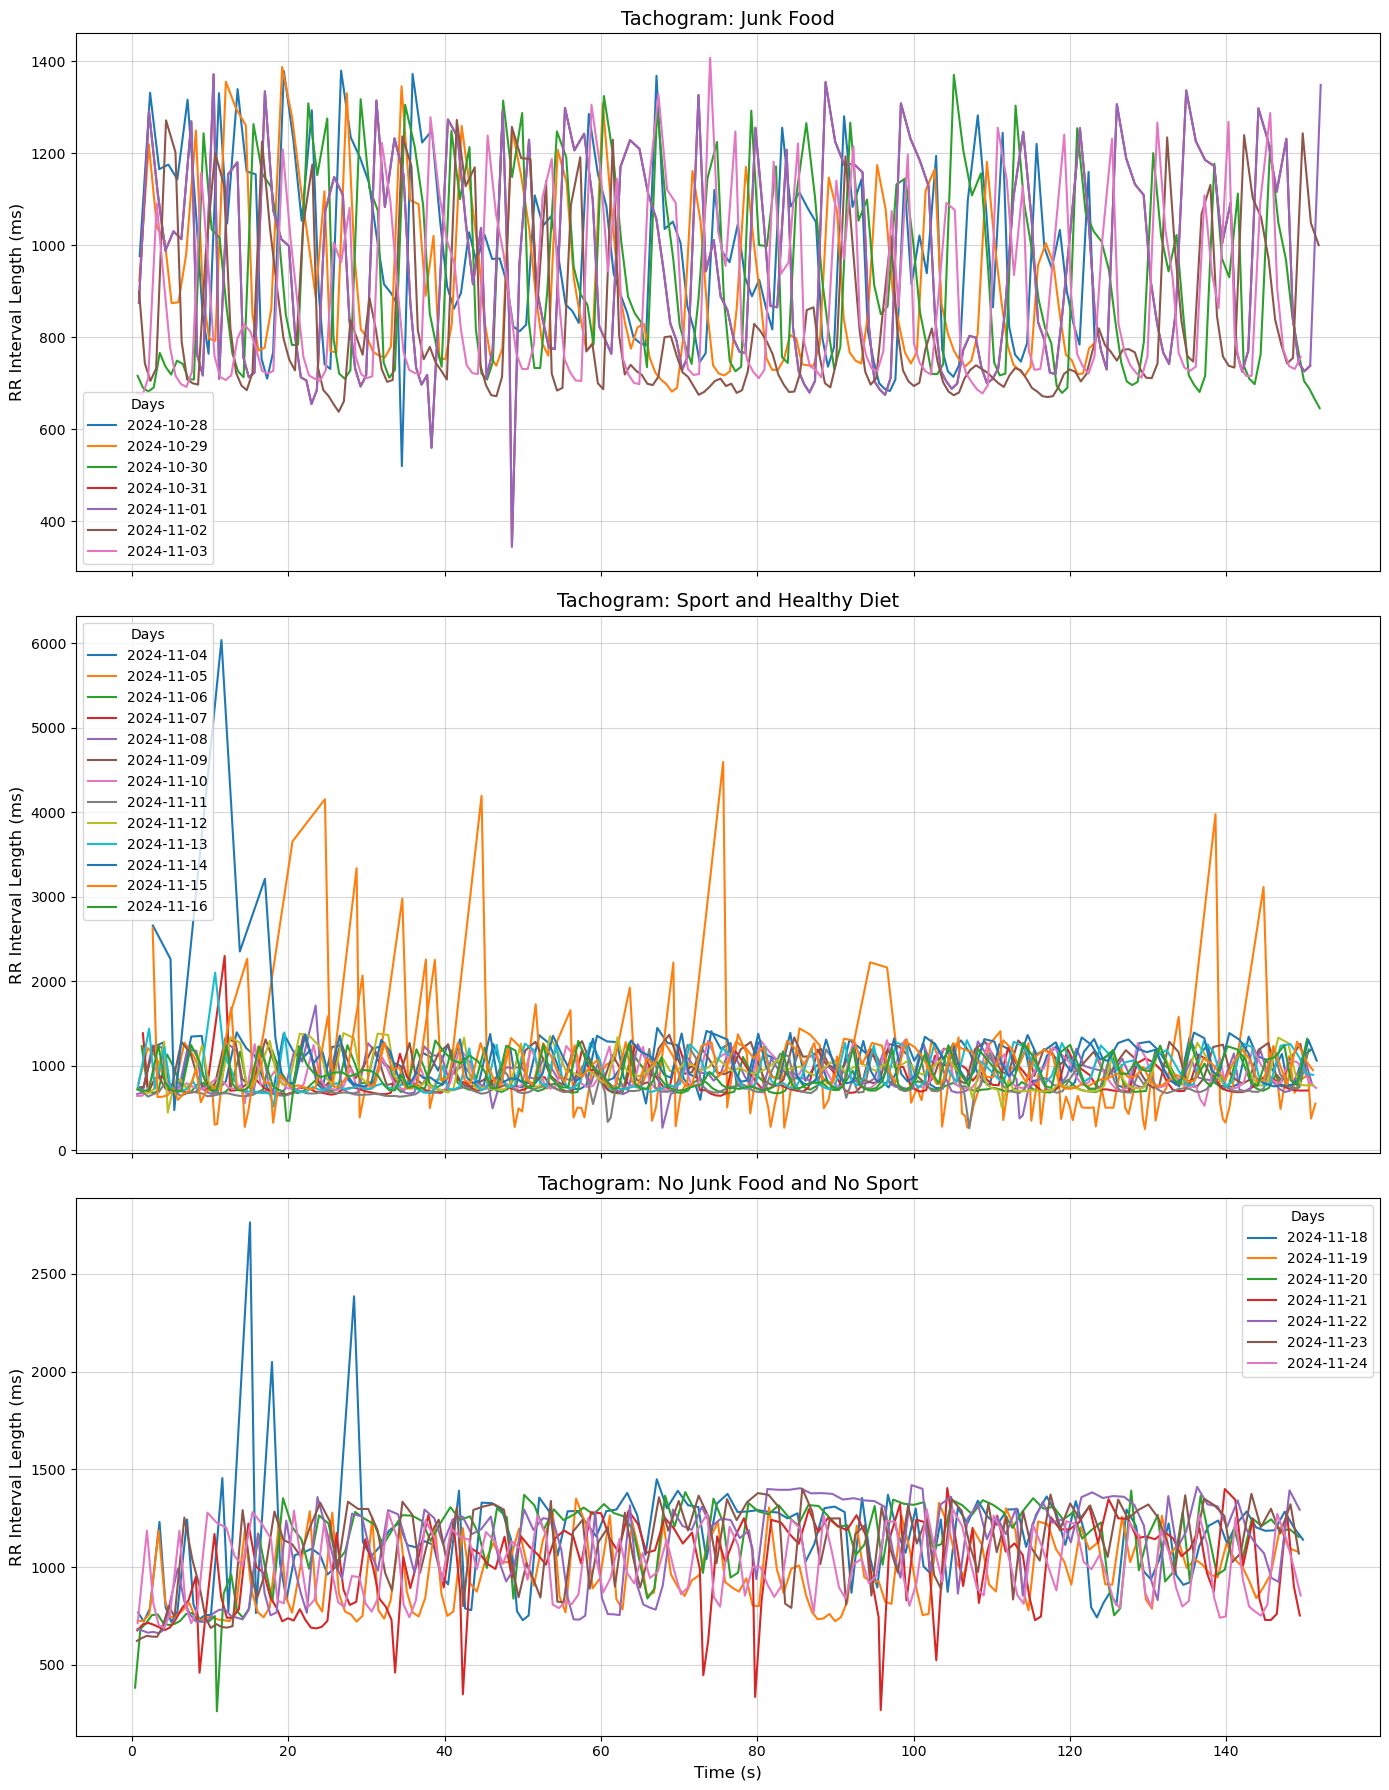

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
file_path = '/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/projet PY/Github py /VFC-Analysis/data/data4semainesfinal.csv'
data = pd.read_csv(file_path, delimiter=';')

# Supprimer les espaces dans les noms de colonnes
data.columns = data.columns.str.strip()

# Convertir les colonnes pertinentes en numérique, en gérant les erreurs
data['Time   (s)'] = pd.to_numeric(data['Time   (s)'], errors='coerce')
data['RR interval   (s)'] = pd.to_numeric(data['RR interval   (s)'], errors='coerce')

# Convertir la colonne Date en format datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Nettoyer les données : retirer les lignes contenant des valeurs NaN
cleaned_data = data.dropna(subset=['Time   (s)', 'RR interval   (s)', 'Date'])

# Définir les périodes basées sur les dates spécifiées
periods = {
    "Junk Food": ["2024-10-28","2024-10-29", "2024-10-30","2024-10-31", "2024-11-01","2024-11-02","2024-11-03"],
    "Sport and Healthy Diet": ["2024-11-04","2024-11-05", "2024-11-06", "2024-11-07", "2024-11-08","2024-11-09", 
                               "2024-11-10","2024-11-11", "2024-11-12","2024-11-13", "2024-11-14","2024-11-15","2024-11-16", "2024-11-17"],
    "No Junk Food and No Sport": ["2024-11-18","2024-11-19","2024-11-20","2024-11-21", "2024-11-22", "2024-11-23","2024-11-24"]
}

# Convertir les périodes en datetime pour le filtrage
periods = {key: [pd.to_datetime(date) for date in dates] for key, dates in periods.items()}

# Créer des sous-ensembles de données pour chaque période
period_data = {}
for period_name, dates in periods.items():
    period_data[period_name] = cleaned_data[cleaned_data['Date'].isin(dates)]
    # Ajouter une colonne pour les intervalles RR en millisecondes
    period_data[period_name]['RR interval (ms)'] = period_data[period_name]['RR interval   (s)'] * 1000

# Tracer les tachogrammes pour chaque période
fig, axes = plt.subplots(len(period_data), 1, figsize=(14, 18), sharex=True)

for ax, (period_name, data_subset) in zip(axes, period_data.items()):
    for day in data_subset['Date'].unique():
        day_data = data_subset[data_subset['Date'] == day]
        ax.plot(day_data['Time   (s)'], day_data['RR interval (ms)'], 
                label=f"{pd.to_datetime(day).strftime('%Y-%m-%d')}")
    ax.set_title(f"Tachogram: {period_name}", fontsize=14)
    ax.set_ylabel("RR Interval Length (ms)", fontsize=12)
    ax.legend(title="Days")
    ax.grid(alpha=0.5)

axes[-1].set_xlabel("Time (s)", fontsize=12)

plt.tight_layout()
plt.show()


/var/folders/y_/tj2z2rjx2tg65pt0gnbj_k3h0000gn/T/ipykernel_33159/74208636.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data[period_name]['RR interval (ms)'] = period_data[period_name]['RR interval   (s)'] * 1000
/var/folders/y_/tj2z2rjx2tg65pt0gnbj_k3h0000gn/T/ipykernel_33159/74208636.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data[period_name]['RR interval (ms)'] = period_data[period_name]['RR interval   (s)'] * 1000
/var/folders/y_/tj2z2rjx2tg65pt0gnbj_k3h0000gn/T/ipykernel_3

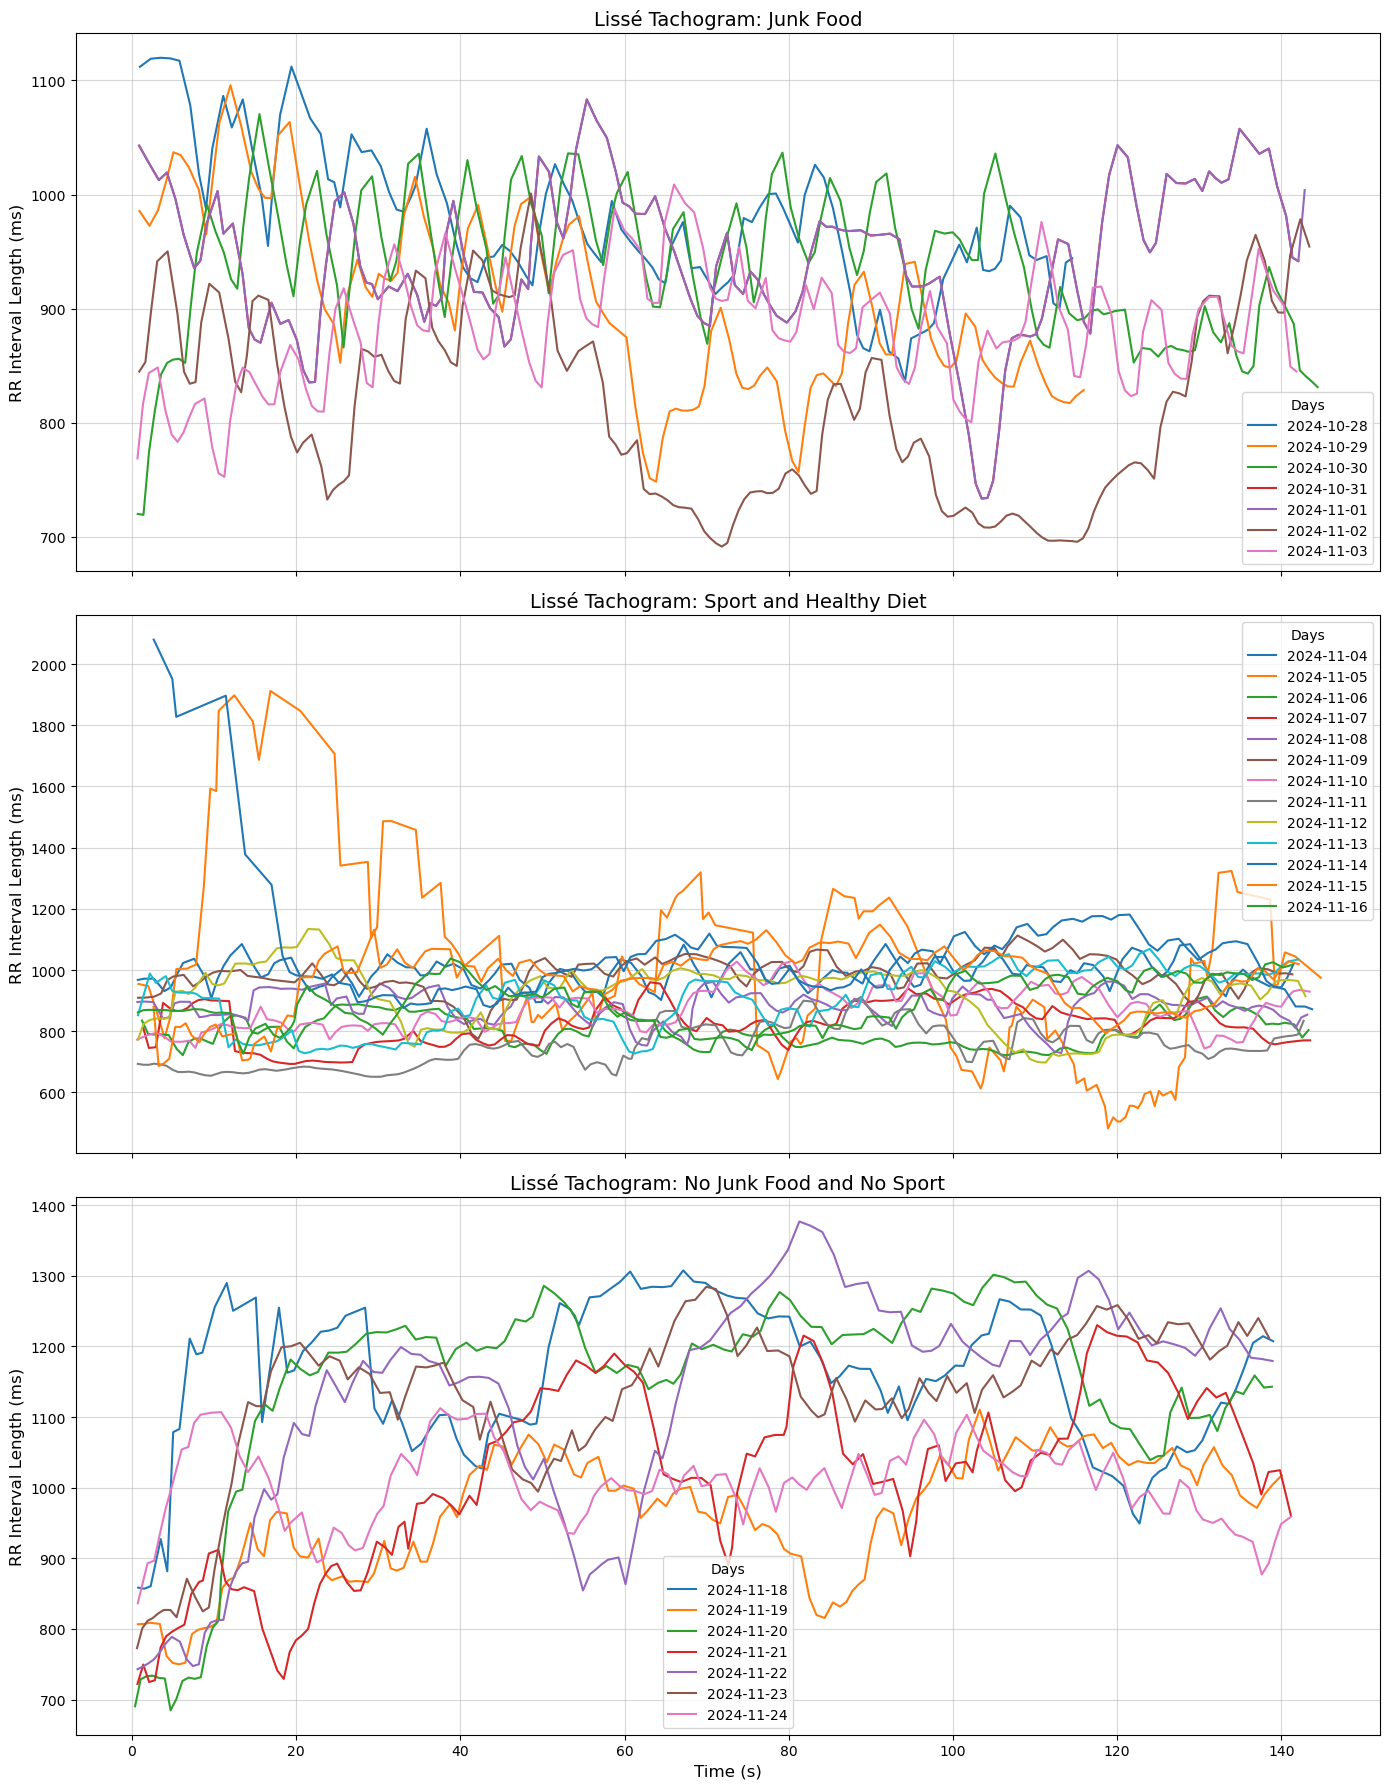

In [110]:
# Convertir les périodes en datetime pour le filtrage
periods = {key: [pd.to_datetime(date) for date in dates] for key, dates in periods.items()}

# Créer des sous-ensembles de données pour chaque période
period_data = {}
for period_name, dates in periods.items():
    period_data[period_name] = cleaned_data[cleaned_data['Date'].isin(dates)]
    # Ajouter une colonne pour les intervalles RR en millisecondes
    period_data[period_name]['RR interval (ms)'] = period_data[period_name]['RR interval   (s)'] * 1000

# Tracer les tachogrammes lissés pour chaque période
fig, axes = plt.subplots(len(period_data), 1, figsize=(14, 18), sharex=True)

for ax, (period_name, data_subset) in zip(axes, period_data.items()):
    for day in data_subset['Date'].unique():
        day_data = data_subset[data_subset['Date'] == day]
        
        # Lissage des données avec une moyenne mobile
        time = day_data['Time   (s)'].values
        rr_intervals = day_data['RR interval (ms)'].values
        smoothed_rr_intervals = np.convolve(rr_intervals, np.ones(10)/10, mode='valid')  # Moyenne mobile sur 10 points
        
        # Tracer le tachogramme lissé
        ax.plot(time[:len(smoothed_rr_intervals)], smoothed_rr_intervals, label=f"{pd.to_datetime(day).strftime('%Y-%m-%d')}")
    
    ax.set_title(f"Lissé Tachogram: {period_name}", fontsize=14)
    ax.set_ylabel("RR Interval Length (ms)", fontsize=12)
    ax.legend(title="Days")
    ax.grid(alpha=0.5)

axes[-1].set_xlabel("Time (s)", fontsize=12)

plt.tight_layout()
plt.show()

### Interprétation des tachogrammes lissés

Les graphiques montrent les **variations des intervalles RR** (en millisecondes) en fonction du temps avec différentes périodes de suivi cardiaque. Les périodes sont : **Junk Food**, **Sport and Healthy Diet**, et **No Junk Food and No Sport**. 

### 1. **Junk Food**
  - Les intervalles RR oscillent principalement entre **800 ms** et **1100 ms**.
  - Il y a des variations rapides dans les intervalles RR, indiquant des fluctuations cardiaques importantes.
  - Ces fluctuations peuvent être dues à des changements rapides de l'activité autonome (système nerveux sympathique et parasympathique).
  - Une activité cardiaque irrégulière pourrait refléter une **augmentation du stress** ou une **dérégulation autonome** liée à une consommation de junk food.
  - Les pics ou baisses soudains indiquent une variabilité cardiaque élevée, ce qui peut parfois refléter une **réponse au stress métabolique**.

---

### 2. **Sport and Healthy Diet**
  - Les intervalles RR montrent une amplitude légèrement plus importante que dans la période Junk Food, avec des valeurs allant de **600 ms** à **2000 ms**.
  - Les variations sont globalement plus régulières, mais on observe des oscillations significatives à certains moments.
  - Une **augmentation des intervalles RR moyens** (parfois atteignant 2000 ms) pourrait indiquer une **baisse du rythme cardiaque**, souvent associée à une activité parasympathique accrue (relaxation, régénération).
  - Cela reflète probablement l'effet bénéfique du sport et de la diète saine sur la variabilité cardiaque (HRV), avec une meilleure régulation autonome et une **meilleure récupération cardiaque**.

---

### 3. **No Junk Food and No Sport**
  - Les intervalles RR oscillent entre **800 ms** et **1400 ms**, avec des variations relativement stables.
  - Les fluctuations sont plus contenues que dans les périodes précédentes, avec des transitions plus progressives.
  - L'absence de junk food et de sport pourrait avoir stabilisé l'activité autonome, entraînant moins de stress métabolique ou physique.
  - Cependant, l'absence d'activité physique pourrait réduire la contribution parasympathique liée au sport, d'où une variabilité légèrement plus basse que pendant la période "Sport and Healthy Diet".

---

### Comparaison entre les périodes
- **Junk Food :** Variabilité élevée mais désordonnée, potentiellement due à une activité autonome erratique causée par des choix alimentaires moins sains.
- **Sport and Healthy Diet :** Variabilité élevée, mais avec des intervalles RR plus longs, reflétant une meilleure régulation cardiaque et une influence parasympathique accrue.
- **No Junk Food and No Sport :** Stabilité accrue par rapport à Junk Food, mais moins de variabilité que pendant le sport, ce qui reflète un équilibre mais sans stimulation supplémentaire.

---

### Points clés à surveiller :
1. **Amplitude des intervalles RR :**
   - Plus les intervalles RR sont longs et réguliers, plus cela reflète une bonne récupération cardiaque et un contrôle autonome équilibré.
2. **Variabilité des intervalles RR :**
   - Une variabilité trop élevée ou désordonnée peut indiquer un stress ou une mauvaise régulation.
3. **Effets du mode de vie :**
   - Le sport et une alimentation saine semblent favoriser une meilleure variabilité cardiaque, tandis que le junk food induit des fluctuations erratiques.

---

Si vous souhaitez une analyse quantitative ou des calculs supplémentaires (e.g., fréquence cardiaque moyenne, bandes LF/HF), n'hésitez pas à demander !

### PSD 

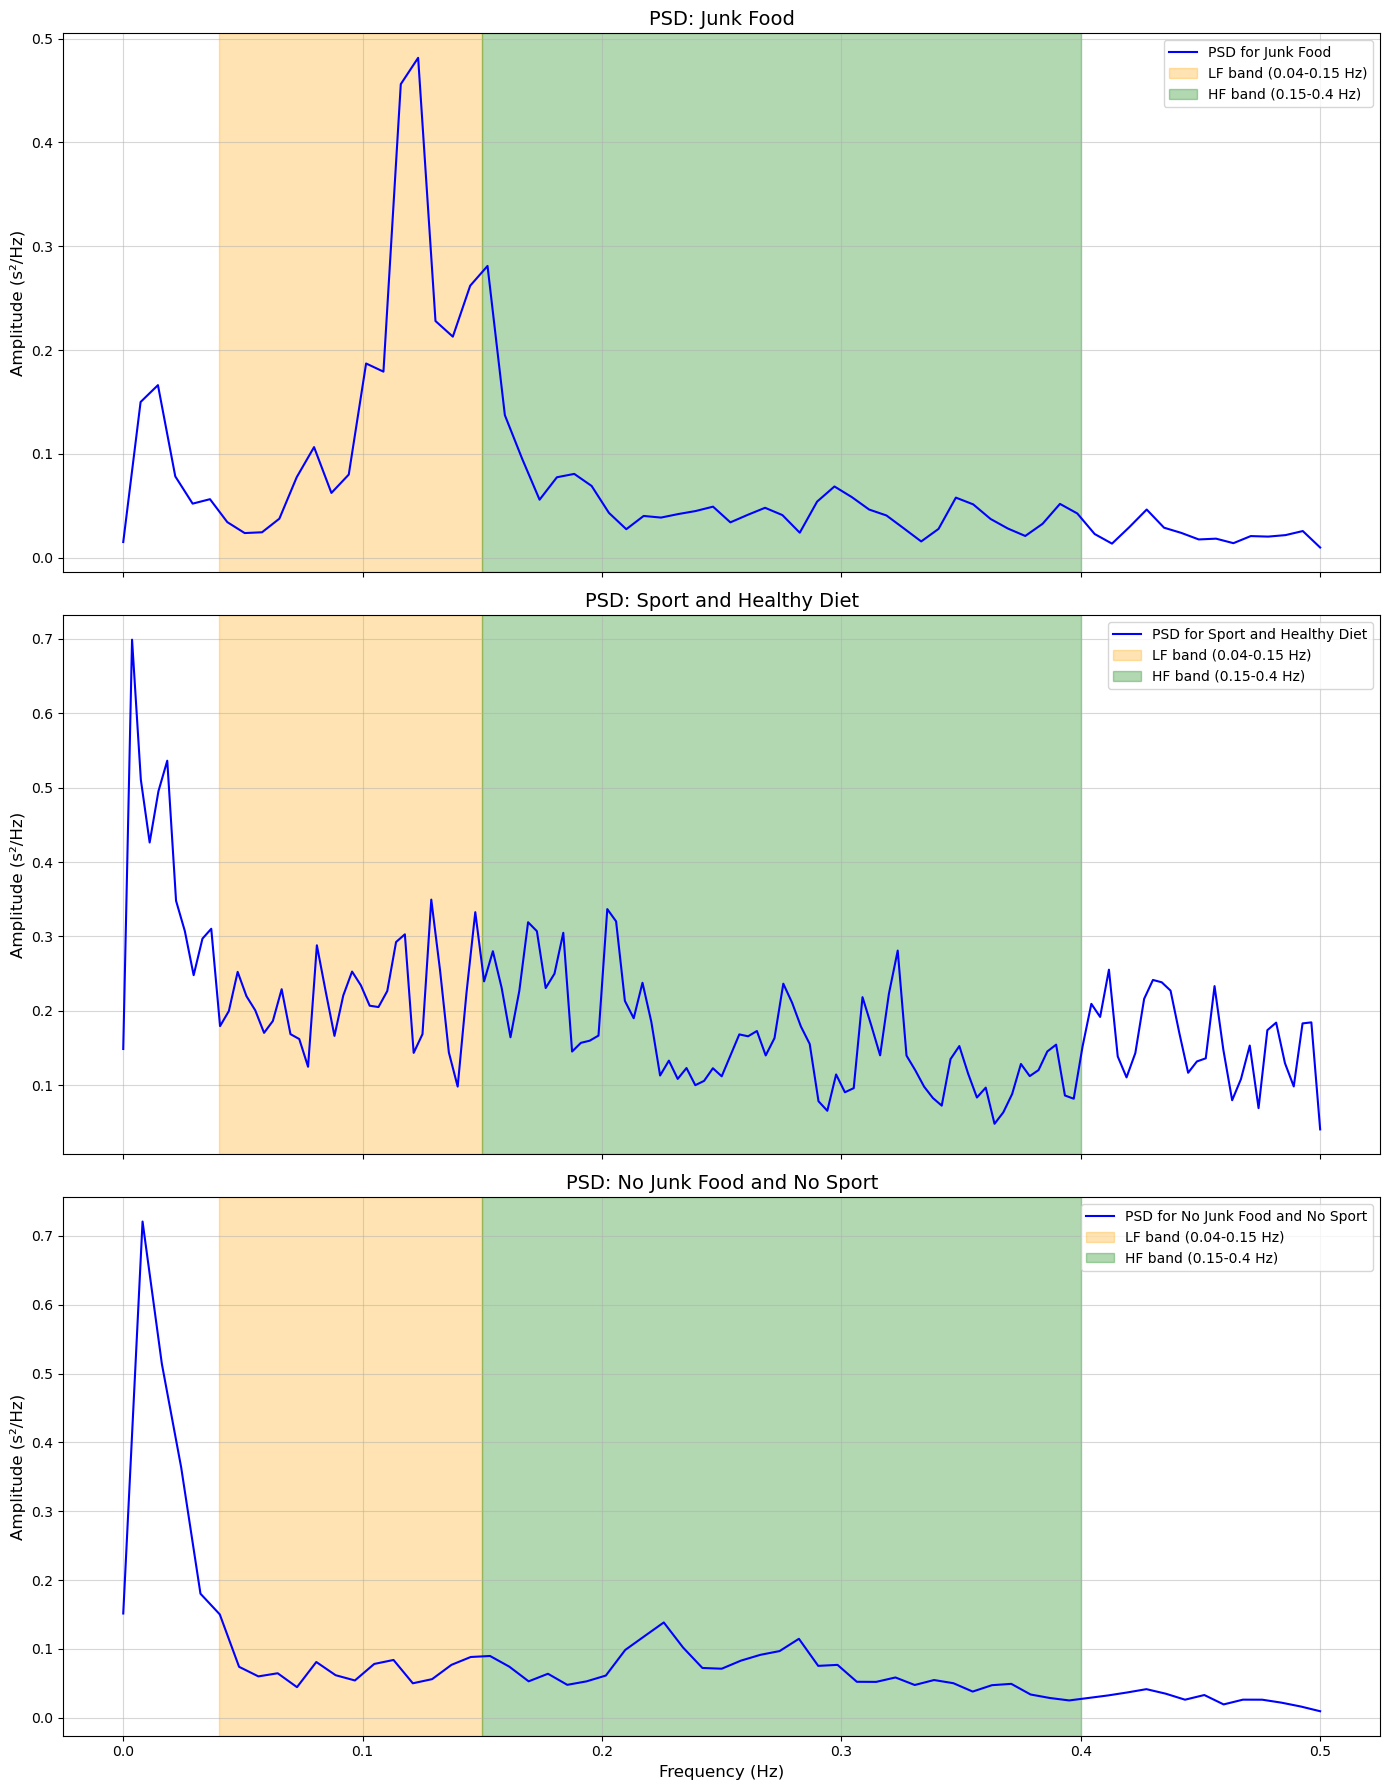

In [109]:
from scipy.signal import welch
import matplotlib.pyplot as plt

# Calcul et tracé de la densité spectrale de puissance (PSD) avec bandes LF et HF
fig, axes = plt.subplots(len(period_data), 1, figsize=(14, 18), sharex=True)

for ax, (period_name, data_subset) in zip(axes, period_data.items()):
    # Combiner toutes les données RR pour la période
    rr_intervals_ms = data_subset['RR interval (ms)'].dropna().values
    rr_intervals_sec = rr_intervals_ms / 1000  # Convertir en secondes pour la PSD
    
    # Calculer la PSD avec la méthode de Welch
    frequencies, psd = welch(rr_intervals_sec, fs=1.0, nperseg=len(rr_intervals_sec)//8)
    
    # Convertir la PSD en ms²/Hz
    psd_ms2 = psd  # Convertir de s²/Hz en ms²/Hz
    
    # Tracer la PSD
    ax.plot(frequencies, psd_ms2, label=f"PSD for {period_name}", color="blue")
    
    # Ajouter des bandes LF (0.04-0.15 Hz) et HF (0.15-0.4 Hz)
    ax.axvspan(0.04, 0.15, color="orange", alpha=0.3, label="LF band (0.04-0.15 Hz)")
    ax.axvspan(0.15, 0.4, color="green", alpha=0.3, label="HF band (0.15-0.4 Hz)")
    
    ax.set_title(f"PSD: {period_name}", fontsize=14)
    ax.set_ylabel("Amplitude (s²/Hz)", fontsize=12)
    ax.grid(alpha=0.5)
    ax.legend()

axes[-1].set_xlabel("Frequency (Hz)", fontsize=12)

plt.tight_layout()
plt.show()


### Interprétation des spectres de densité spectrale de puissance (PSD)

Ces graphiques montrent la **distribution spectrale de puissance** pour chaque période (**Junk Food**, **Sport and Healthy Diet**, et **No Junk Food and No Sport**). La PSD est divisée en deux bandes de fréquence importantes :

- **LF (Low Frequency, 0.04-0.15 Hz)** : Liée à l'activité du système nerveux sympathique et partiellement parasympathique.
- **HF (High Frequency, 0.15-0.4 Hz)** : Liée à l'activité parasympathique, principalement influencée par la respiration.


### 1. **Junk Food**
  - Une grande concentration de puissance est visible dans la bande LF (0.04–0.15 Hz).
  - La puissance dans la bande HF (0.15–0.4 Hz) est relativement faible.
  - Le spectre montre une dominance des basses fréquences.
  - Une dominance LF indique une **augmentation de l'activité sympathique**, souvent associée au stress ou à une régulation autonome déséquilibrée.
  - Une faible contribution HF peut refléter une **réduction de l'activité parasympathique**, probablement liée aux effets métaboliques et hormonaux d'une alimentation riche en junk food.
  - Un déséquilibre autonome est probable, avec une prédominance de la régulation sympathique.

---

### 2. **Sport and Healthy Diet**
  - La puissance dans la bande HF (0.15–0.4 Hz) est plus élevée que pendant la période Junk Food.
  - La bande LF (0.04–0.15 Hz) montre également une activité significative, mais elle est moins dominante par rapport à HF.
  - La puissance globale est légèrement plus élevée sur tout le spectre.
  - Une augmentation de la puissance HF reflète une **activité parasympathique accrue**, souvent associée à une meilleure récupération et relaxation.
  - Une contribution équilibrée entre LF et HF peut indiquer une **régulation autonome harmonieuse**, souvent favorisée par le sport et une alimentation saine.
  - La régulation autonome semble optimisée, avec un bon équilibre entre les systèmes sympathique et parasympathique.

---

### 3. **No Junk Food and No Sport**
  - Une grande puissance est visible dans les très basses fréquences (au-dessous de 0.04 Hz), ce qui pourrait être du bruit ou un signal non physiologique.
  - La puissance dans la bande LF est présente mais inférieure à celle de la période Sport and Healthy Diet.
  - La bande HF est modérée, indiquant une réduction de l'activité parasympathique par rapport à la période Sport and Healthy Diet.
  - Une réduction de l'activité HF pourrait indiquer une **diminution de la régulation parasympathique**, probablement due à l'absence d'activité physique.
  - L'activité sympathique (bande LF) reste présente mais est moins dominante que pendant la période Junk Food.
  - La régulation autonome est relativement stable, mais elle manque de stimulation parasympathique active, comme celle observée pendant le sport.

---

### Comparaison entre les périodes

| **Période**                | **LF (0.04–0.15 Hz)**          | **HF (0.15–0.4 Hz)**        | **Interprétation globale**                     |
|----------------------------|--------------------------------|-----------------------------|------------------------------------------------|
| **Junk Food**              | Dominante                     | Faible                      | Déséquilibre autonome, dominance sympathique. |
| **Sport and Healthy Diet** | Équilibrée avec HF dominante  | Élevée                      | Régulation autonome optimisée, relaxation.    |
| **No Junk Food and No Sport** | Modérée                     | Modérée                     | Régulation stable mais moins stimulée.        |

---

### Points importants :
1. **Effet du junk food :**
   - Une alimentation déséquilibrée favorise une dominance sympathique et réduit la régulation parasympathique.
   - Cela peut augmenter le stress physiologique et diminuer la récupération.

2. **Effet du sport et de l'alimentation saine :**
   - Favorise une régulation autonome équilibrée, augmentant l'activité parasympathique.
   - Cela reflète une amélioration globale de la santé cardiovasculaire.

3. **Effet de l'absence de junk food et de sport :**
   - Une certaine stabilité est atteinte, mais l'absence d'activité physique réduit l'influence parasympathique.


In [116]:
from scipy.signal import welch

def calculate_lf_hf_ratio(rr_intervals):
    """
    Calcule la puissance LF, HF et le rapport LF/HF à partir des intervalles RR.

    :param rr_intervals: Liste ou tableau des intervalles RR en millisecondes
    :return: (lf_power, hf_power, lf_hf_ratio)
    """
    # Convertir les intervalles RR en secondes
    rr_intervals_sec = rr_intervals / 1000
    
    # Calculer la PSD avec Welch
    frequencies, psd = welch(rr_intervals_sec, fs=1.0, nperseg=len(rr_intervals_sec) // 8)
    
    # Calculer la puissance LF (0.04–0.15 Hz)
    lf_band = (frequencies >= 0.04) & (frequencies < 0.15)
    lf_power = psd[lf_band].sum()
    
    # Calculer la puissance HF (0.15–0.4 Hz)
    hf_band = (frequencies >= 0.15) & (frequencies < 0.4)
    hf_power = psd[hf_band].sum()
    
    # Calculer le rapport LF/HF
    if hf_power > 0:
        lf_hf_ratio = lf_power / hf_power
    else:
        lf_hf_ratio = None  # Éviter la division par zéro
    
    return lf_power, hf_power, lf_hf_ratio


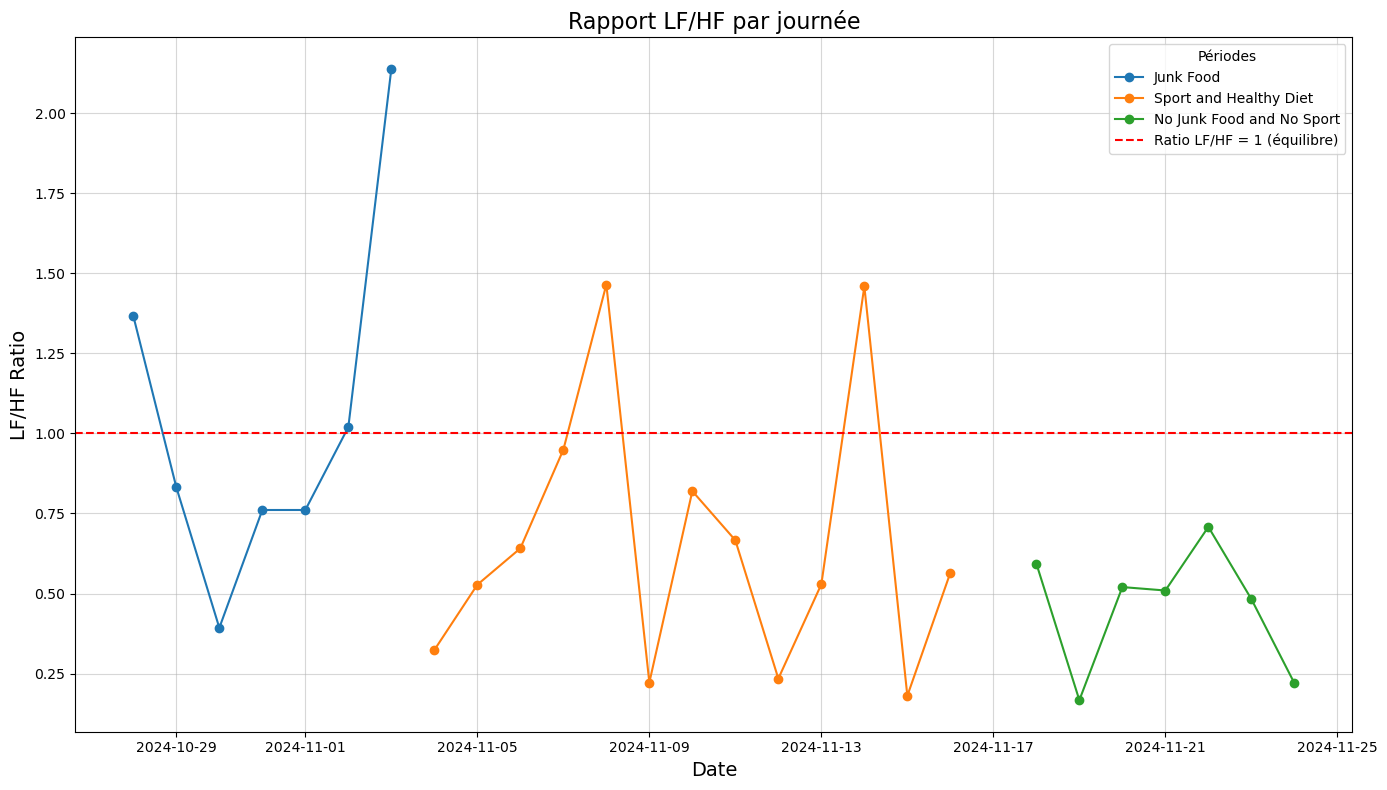

In [117]:
# Recréer le DataFrame lf_hf_df si nécessaire et relancer l'analyse

# Vérification que les données et les calculs sont bien disponibles
if 'lf_hf_df' not in locals():
    lf_hf_results = []

    for period_name, data_subset in period_data.items():
        for day in data_subset['Date'].unique():
            day_data = data_subset[data_subset['Date'] == day]
            rr_intervals_ms = day_data['RR interval (ms)'].dropna().values
            
            # Calculer LF, HF et le rapport LF/HF
            lf_power, hf_power, lf_hf_ratio = calculate_lf_hf_ratio(rr_intervals_ms)
            
            lf_hf_results.append({
                "Period": period_name,
                "Date": day,
                "LF Power": lf_power,
                "HF Power": hf_power,
                "LF/HF Ratio": lf_hf_ratio
            })

    # Convertir en DataFrame
    lf_hf_df = pd.DataFrame(lf_hf_results)

# Tracer les rapports LF/HF par jour
import matplotlib.pyplot as plt

# Convertir les dates pour un affichage plus clair
lf_hf_df['Date'] = pd.to_datetime(lf_hf_df['Date'])

# Séparer les données par périodes pour les tracer distinctement
periods = lf_hf_df['Period'].unique()

# Créer le graphique
plt.figure(figsize=(14, 8))

for period in periods:
    period_data = lf_hf_df[lf_hf_df['Period'] == period]
    plt.plot(period_data['Date'], period_data['LF/HF Ratio'], marker='o', label=period)

# Personnaliser le graphique
plt.title("Rapport LF/HF par journée", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("LF/HF Ratio", fontsize=14)
plt.axhline(y=1, color='red', linestyle='--', label="Ratio LF/HF = 1 (équilibre)")
plt.legend(title="Périodes")
plt.grid(alpha=0.5)
plt.tight_layout()

# Afficher le graphique
plt.show()


### Analyse du graphique du rapport LF/HF par journée

Le graphique montre l'évolution du **rapport LF/HF** pour différentes périodes :
- **Junk Food (bleu)** : Alimentation déséquilibrée, sans sport.
- **Sport and Healthy Diet (orange)** : Alimentation saine combinée à une activité physique.
- **No Junk Food and No Sport (vert)** : Alimentation saine, sans activité physique.

#### Interprétation des axes
- **Axe des ordonnées (LF/HF Ratio)** :
  - Un ratio **LF/HF > 1** indique une dominance du système nerveux sympathique (stress, vigilance).
  - Un ratio **LF/HF < 1** reflète une dominance parasympathique (relaxation, récupération).
- **Axe des abscisses (Date)** :
  - Chaque point représente une journée spécifique dans une période donnée.

---


#### **1. Junk Food (bleu)**

  - Le ratio LF/HF est très variable, passant en dessous de 1 (dominance parasympathique) puis remontant au-dessus de 1 (dominance sympathique).
  - Le pic le plus élevé apparaît autour du **1er novembre**, avec un ratio supérieur à **2**.
  - Cette variabilité peut indiquer une régulation autonome déséquilibrée due à une alimentation déséquilibrée (junk food).
  - Les valeurs faibles de LF/HF indiquent une faible activité sympathique, ce qui peut refléter une fatigue ou un stress métabolique.
  - Le pic élevé du 1er novembre pourrait être lié à un stress soudain ou une activité physique non habituelle.

#### **2. Sport and Healthy Diet (orange)**

  - Une forte variabilité du rapport LF/HF, avec des valeurs oscillant entre 0.3 et environ 2.
  - La majorité des valeurs se situent autour de **1**, indiquant un équilibre autonome global.
  - L'activité physique combinée à une alimentation saine favorise un équilibre autonome (LF/HF ≈ 1), ce qui est un signe de régulation cardiaque optimale.
  - Les pics plus élevés de LF/HF (dominance sympathique) peuvent correspondre à des efforts physiques intenses.
  - Les chutes du rapport LF/HF (dominance parasympathique) reflètent des phases de récupération post-exercice.

#### **3. No Junk Food and No Sport (vert)**
  - Les valeurs du rapport LF/HF sont relativement faibles, avec peu de fluctuations importantes.
  - Le ratio oscille entre **0.5 et 1**, restant souvent en dessous de 1.
  - L'absence de junk food stabilise la régulation autonome, mais l'absence de sport réduit les stimulations sympathiques (LF).
  - La prédominance parasympathique reflétée par des ratios inférieurs à 1 est cohérente avec une période de repos sans activité physique significative.

---

### Comparaison des périodes

| **Période**                | **LF/HF Variabilité**         | **Tendance Dominante**    | **Interprétation Globale**                           |
|----------------------------|------------------------------|--------------------------|-----------------------------------------------------|
| **Junk Food**              | Moyenne à élevée            | Sympathique et variable  | Déséquilibre autonome dû à l'alimentation.          |
| **Sport and Healthy Diet** | Très élevée                 | Sympathique/équilibrée   | Régulation autonome optimisée par le sport.         |
| **No Junk Food and No Sport** | Faible                     | Parasympathique          | Stabilité sans stimulation due au manque de sport. |

---

### Points clés
1. **Junk Food :**
   - Variabilité importante, avec des pics montrant des moments de stress ou de déséquilibre.
   - L'absence de régulation stable reflète l'impact négatif d'une alimentation déséquilibrée.

2. **Sport and Healthy Diet :**
   - Une alternance harmonieuse entre LF et HF, avec des ratios proches de 1.
   - L'activité physique favorise l'équilibre autonome et une meilleure récupération.

3. **No Junk Food and No Sport :**
   - Stabilité autonome sans stimulation excessive.
   - Les ratios inférieurs à 1 montrent une prédominance parasympathique liée au repos.

---

### Conclusion
Le **sport et une alimentation saine** (orange) favorisent un équilibre optimal (LF/HF ≈ 1), tandis que le junk food (bleu) induit une variabilité accrue et des déséquilibres. Une alimentation saine seule (vert) stabilise le système autonome mais manque des bienfaits stimulants de l'activité physique.

# LF, HF et  LF/HF

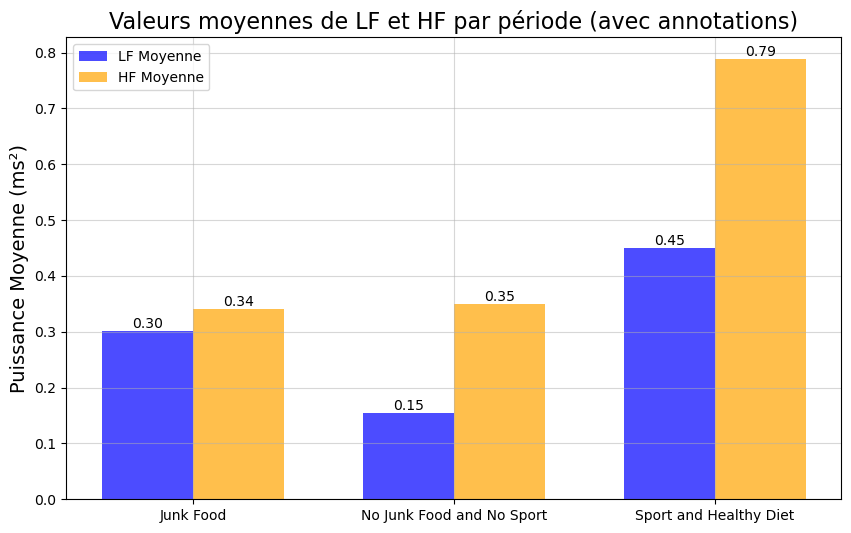

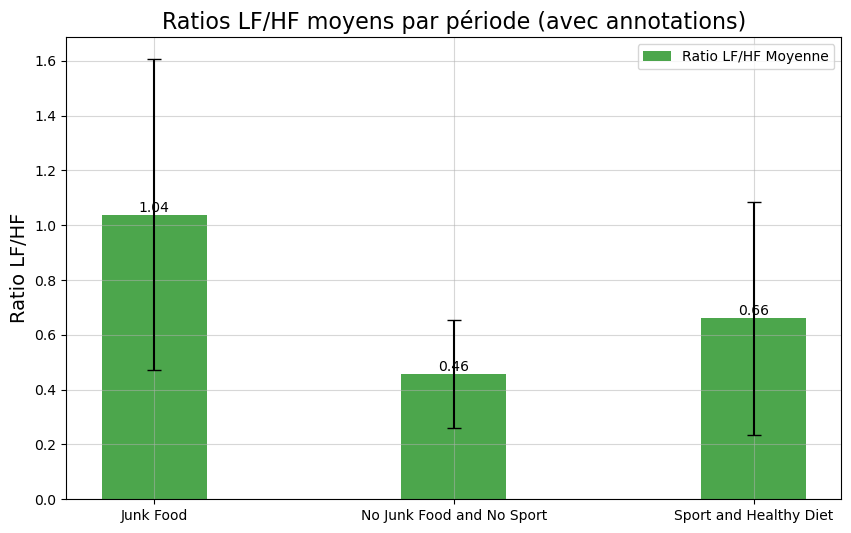

In [119]:
# Tracer l'histogramme des valeurs moyennes LF et HF avec annotations
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barres pour LF et HF moyennes
bars_lf = ax1.bar(x - bar_width / 2, summary_stats["LF_Mean"], bar_width, label="LF Moyenne", color="blue", alpha=0.7)
bars_hf = ax1.bar(x + bar_width / 2, summary_stats["HF_Mean"], bar_width, label="HF Moyenne", color="orange", alpha=0.7)

# Ajouter les annotations pour LF et HF
for bar in bars_lf:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f}", 
             ha="center", va="bottom", fontsize=10)
for bar in bars_hf:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f}", 
             ha="center", va="bottom", fontsize=10)

# Personnalisation de l'histogramme
ax1.set_title("Valeurs moyennes de LF et HF par période (avec annotations)", fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(summary_stats["Period"])
ax1.set_ylabel("Puissance Moyenne (ms²)", fontsize=14)
ax1.legend()
ax1.grid(alpha=0.5)

# Tracer l'histogramme des ratios LF/HF moyens avec annotations
fig, ax2 = plt.subplots(figsize=(10, 6))

# Barres pour les ratios LF/HF moyens
bars_ratio = ax2.bar(x, summary_stats["LF_HF_Ratio_Mean"], bar_width, label="Ratio LF/HF Moyenne", color="green", alpha=0.7, yerr=summary_stats["LF_HF_Ratio_STD"], capsize=5)

# Ajouter les annotations pour les ratios LF/HF
for bar in bars_ratio:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f}", 
             ha="center", va="bottom", fontsize=10)

# Personnalisation de l'histogramme
ax2.set_title("Ratios LF/HF moyens par période (avec annotations)", fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(summary_stats["Period"])
ax2.set_ylabel("Ratio LF/HF", fontsize=14)
ax2.legend()
ax2.grid(alpha=0.5)

# Afficher les graphiques
plt.show()


### Valeurs moyennes de LF et HF par période :

- Junk Food : LF et HF sont presque équivalents, avec des puissances moyennes faibles.

- No Junk Food and No Sport : HF domine légèrement, mais les valeurs restent relativement faibles.

- Sport and Healthy Diet : Les deux puissances (LF et HF) augmentent nettement, avec une domination significative de HF.``

### Ratios LF/HF moyens par période :

- Junk Food : Le ratio est autour de 1, mais avec une grande variabilité, ce qui reflète un déséquilibre et une instabilité dans la régulation autonome.

- No Junk Food and No Sport : Le ratio est inférieur à 1, montrant une dominance parasympathique (repos), et la variabilité est modérée.

- Sport and Healthy Diet : Le ratio se rapproche de 1, montrant un bon équilibre, avec une variabilité relativement importante due aux changements pendant l'activité physique.

### Analyse :
Junk Food montre une régulation autonome instable et un déséquilibre, avec une faible puissance dans les bandes LF et HF.
Sport and Healthy Diet favorise une activité autonome optimale avec une forte régulation parasympathique (HF) et un bon équilibre LF/HF.
No Junk Food and No Sport stabilise la régulation autonome, mais sans les bénéfices stimulants de l'activité physique.


In [69]:
for period_name, (start_date, end_date) in periods.items():
    period_data = hrv_data[(hrv_data['Date'] >= start_date) & (hrv_data['Date'] <= end_date)]
    rr_intervals = period_data['RR interval (s)'].dropna().values
    print(f"{period_name}: {len(rr_intervals)} RR intervals")


Junk Food: 1107 RR intervals
Sport & Healthy Diet: 2314 RR intervals
No Sport & No Junk Food: 863 RR intervals


In [70]:
fft_frequencies, fft_values = compute_fft(rr_intervals)
print(f"FFT Frequencies (first 10): {fft_frequencies[:10]}")
print(f"FFT Values (first 10): {fft_values[:10]}")


FFT Frequencies (first 10): [0.         0.0011587  0.00231741 0.00347611 0.00463482 0.00579352
 0.00695223 0.00811093 0.00926964 0.01042834]
FFT Values (first 10): [26714.8764891    670.21648625   927.44096284   422.40780655
   324.22604596   531.93565482  1363.46395314   164.11231388
   108.68933159   275.53669043]
